Importing necessary labraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

Uploading data file

In [114]:
df = pd.read_csv(r"C:\Users\KIIT01\Documents\ML-projects\Training\riceClassification.csv")

In [115]:
df.head(5)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


Checking columns in data file

In [116]:
df["Class"].unique()

array([1, 0], dtype=int64)

Statistical summary

In [117]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [119]:
df.std()

id                 5249.701658
Area               1467.197150
MajorAxisLength      12.376402
MinorAxisLength      10.061653
Eccentricity          0.030575
ConvexArea         1502.006571
EquivDiameter         9.906250
Extent                0.104389
Perimeter            29.500620
Roundness             0.067310
AspectRation          0.434836
Class                 0.497599
dtype: float64

In [120]:
df.mean()

id                 9093.000000
Area               7036.492989
MajorAxisLength     151.680754
MinorAxisLength      59.807851
Eccentricity          0.915406
ConvexArea         7225.817872
EquivDiameter        94.132952
Extent                0.616653
Perimeter           351.606949
Roundness             0.707998
AspectRation          2.599081
Class                 0.549079
dtype: float64

In [121]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

Id column removal

In [122]:

df = df.iloc[:, 1:]

In [123]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


Heatmap

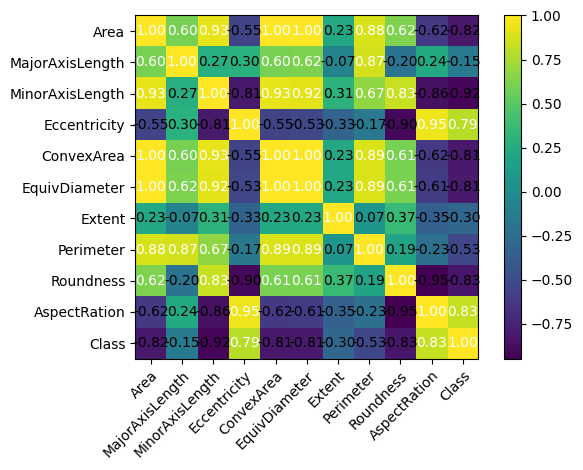

In [135]:
#Variable correlation check via Heatmap
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names = df.columns, column_names = df.columns)
plt.tight_layout()
plt.show()

Splitting dataset into independant and dependant variables

In [124]:
#Split dataset in X, y
X = df.iloc[:,1:-1]
X.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


In [125]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [126]:
#let splite the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [127]:
X_test.shape

(3637, 9)

In [128]:
#Model selection
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion="entropy")
train = RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)




In [129]:
#Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.9928512510310695

In [130]:
#model selection
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_fit = dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)


In [133]:
#train accuracy
y_train_pred = dtc.predict(X_train)
accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
#test accuracy
accuracy_score(y_test, y_pred)

0.9925762991476491

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SDG_fit = SGD.fit(X_train, y_train)
y_pred3 = SGD.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.951333516634589